# <center> Make_spheres_3D </center>

Данное построение основано на библиотеке Sklearn.

* Аргументы данной фенкции соответсвуют аргументам функции make_circles.
* Возвращает массив элементов вида [X, Y, Z, label] для каждого уровня.
* На выходе получаем две сферы, одна внутри другой.

* Основная мысль:
    Сфера в проекции - круг: Создадим много кругов разных радиусов. Добавим ось OZ -> получили сферу.

In [1]:
import time
from numpy import arange
import matplotlib.pyplot as plt
from math import pi, sin, ceil
from mpl_toolkits import mplot3d
from sklearn.datasets import make_circles

In [2]:
def make_sphere(n_samp_user = 1000000, shuff = True, nois = None, random_stat = None, factr = 0.5):
    
    tic = time.process_time()
    levels = 10
    # Вспомогательное число
    n_samp = round(n_samp_user * (2/3))
    # Ось OZ
    z = [sin(i) for i in arange(-pi/2, pi/2 + ((pi/2) / levels), (pi/2) / levels)]
    # Нумерация уровней
    level_i = [abs(i) for i in range(-levels, levels+1)]
    # Расчет кол-ва точек на кажом уровне
    sampl_i = [ceil(n_samp / 2) if i == 0 else ceil((n_samp / 2) * (1 / pow(2, i))) for i in level_i]
    # Поддержание контрольной суммы
    sampl_i[levels] -= (sum(sampl_i) - n_samp_user)
    
    mass_xyz = []
    for i in range(len(level_i)):
        xy, label = make_circles(n_samples = sampl_i[i], noise=nois, random_state=random_stat, factor = factr)
        xy[:, 0] = xy[:, 0] * ((levels + 1 - level_i[i])/(levels))
        xy[:, 1] = xy[:, 1] * ((levels + 1 - level_i[i])/(levels))
        # Добавление для каждого уровня [X, Y, Z, label]
        mass_xyz.append([xy[:, 0], xy[:, 1], z[i], label])
        
    toc = time.process_time()
    print(f"Вычисление заняло {toc - tic:0.4f} секунд")
    print('Построено точек:', sum(sampl_i))
        
    return mass_xyz

Вычисление заняло 0.1875 секунд
Построено точек: 1000000


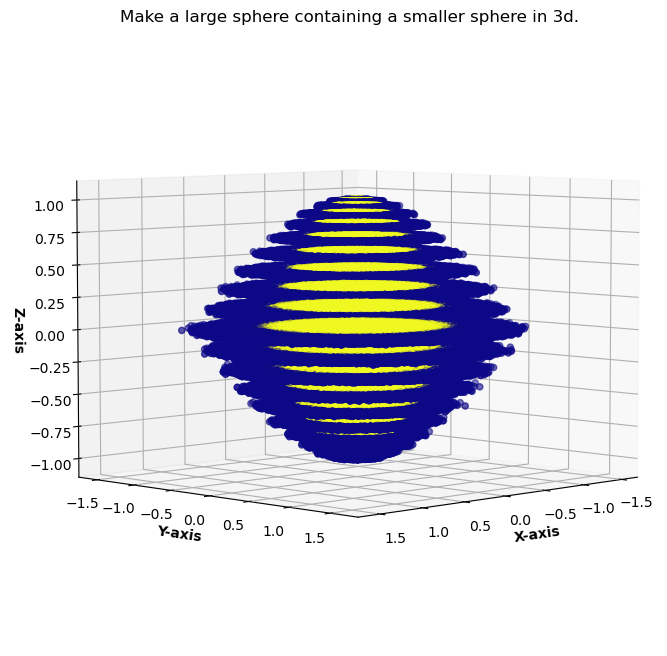

In [3]:
mass = make_sphere(n_samp_user = 1000000, shuff = True, nois = 0.1, random_stat = None, factr = 0.5)

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.view_init(5, 45)
for i in mass: ax.scatter(i[0], i[1], i[2], c=i[3], cmap='plasma')
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
plt.title('Make a large sphere containing a smaller sphere in 3d.')
plt.show()

## Обоснование формул:

Шаг 1:
* Задаем количество уровней кругов-проекций $levels$ при z > 0. Столько же их будет при z < 0.
* Разбиваем ось OZ по синусоидальному закону на отрезке [-1, 1] по следующей формуле:
* z = sin(i), где i принимает значение от -pi/2 до pi/2 включительно с шагом (pi/2) / levels)
* При этом: len(z) =  2 * levels (z > 0 and z < 0) + 1 (z == 0)

Шаг 2:
* Расчет вспомогательного числа $n-samp$ точек  (см. пункт ). На выходе будет возвращено заданное пользователем $n-samp-user$ точек.
* $n-samp$ = $round(n-samp-user * (2/3))$

Шаг 3:
* Считаем массив level_i индексов уровней: [-levels, -levels+1, ..., 0, ..., levels-1, levels]
* level_i = модуль(i), где i принимает значение от -levels до levels включительно с шагом 1.

Шаг 4:
* Рассчитываем массив sampl_i количева точек на каждом уровне:
* На 0м уровне n_samp / 2 точек
* На 1м и -1м по n_samp / 4, в сумме на них будет n_samp / 2
* На 2м и -2м по n_samp / 8, в сумме на них будет n_samp / 4
* Так как сумма прогрессии N + N/2 + N/4 + N/8 + ... = 2N, отсюда следует, что наша сумма
* N/2 + N/2 + N/4 + N/8 + ... = 2N-N/2 = 3N/2 = 3 * n_samp / 2
* Количество точек больше, чем надо. Однако $n-samp$ - вспомогательное число, которое было равно (2*n_samp_user)/3
* Делая обратное преобразование, получаем, что посчитали 3 * [(2*n_samp_user)/3] / 2 = n_samp_user точек. Что и требовалось.
* __
* Из-за округления кол-ва точек вверх при помощи функции ceil (так как кол-во точек - целое число)
* Делаем корректировку данного числа на 0м уровне (самом плотном) на разницу, на которую было больше построено, чем требовалось:
* sampl_i[levels] -= (sum(sampl_i) - n_samp_user)

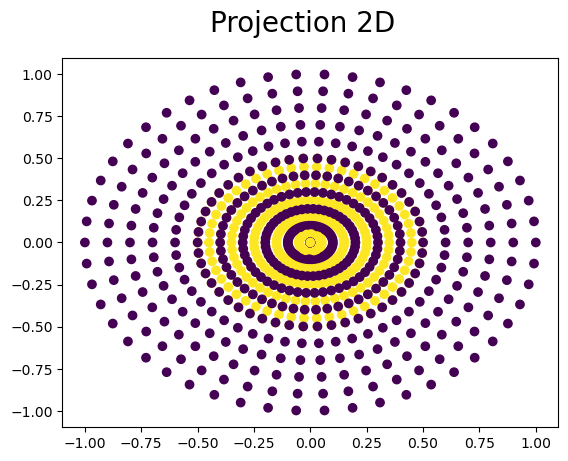

In [6]:
# Проекция 2D
from sklearn.datasets import make_circles

xy_0, label = make_circles(noise=0,random_state=None, factor = 0.5)
mass_xy = [xy_0]

for i in range(9, -1, -1):
    xy_i = xy_0.copy()
    xy_i[:, 0] = xy_i[:, 0] * (i/10)
    xy_i[:, 1] = xy_i[:, 1] * (i/10)
    mass_xy.append(xy_i)
    
for i in mass_xy:
    plt.scatter(i[:,0], i[:,1], c=label, vmin=min(label), vmax=max(label))

fig.subplots_adjust(hspace=0.3,wspace=.3)
plt.suptitle('Projection 2D',fontsize=20)
plt.show()